In [3]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('../log/A100_single/logFile_numPointsTotal10000_numBlocksPerProcess100_m100_seed0_isScaled0.csv')

# Display the first few rows of the data
display(df.head())

# Show basic information about the dataset
display(df.info())

,duration_outer_partitioning,duration_finer_partitioning,duration_candidate_preparation,duration_nn_searching,duration_computation,duration_total,total_gflops,numPointsPerProcess,numPointsTotal,numBlocksPerProcess,numBlocksTotal,m,seed,mspe,rmspe,ci_coverage,optimized_log_likelihood
0,0.002436,0.020181,0.003462,0.02101,1.197227,1.307238,0.591757,10000,10000,100,100,100,0,-1,-1,-1,7291.985958


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   duration_outer_partitioning     1 non-null      float64
 1   duration_finer_partitioning     1 non-null      float64
 2   duration_candidate_preparation  1 non-null      float64
 3   duration_nn_searching           1 non-null      float64
 4   duration_computation            1 non-null      float64
 5   duration_total                  1 non-null      float64
 6   total_gflops                    1 non-null      float64
 7   numPointsPerProcess             1 non-null      int64  
 8   numPointsTotal                  1 non-null      int64  
 9   numBlocksPerProcess             1 non-null      int64  
 10  numBlocksTotal                  1 non-null      int64  
 11  m                               1 non-null      int64  
 12  seed                            1 non-nu

None

In [11]:
import numpy as np

N_bsv = [10000, 20000, 50000, 80000, 100000, 200000, 500000, 800000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000]
N_sc = [10000, 20000, 50000, 80000, 100000, 200000, 500000]

m_sbv = [100, 200, 300]
m_sc = [60]

time_sbv = []
time_sc = []

for m in m_sbv:
    time_sbv_m = []
    for N in N_bsv:
        try:
            df = pd.read_csv(f'../log/A100_single/logFile_numPointsTotal{N}_numBlocksPerProcess{int(N/100)}_m{m}_seed0_isScaled0.csv')
            time_sbv_m.append(df['duration_total'].iloc[0])
        except FileNotFoundError:
            continue
    time_sbv.append(time_sbv_m)

for N in N_sc:
    df = pd.read_csv(f'../log/A100_single/logFile_numPointsTotal{N}_numBlocksPerProcess{N}_m60_seed0_isScaled0.csv')
    time_sc.append(df['duration_total'].iloc[0])


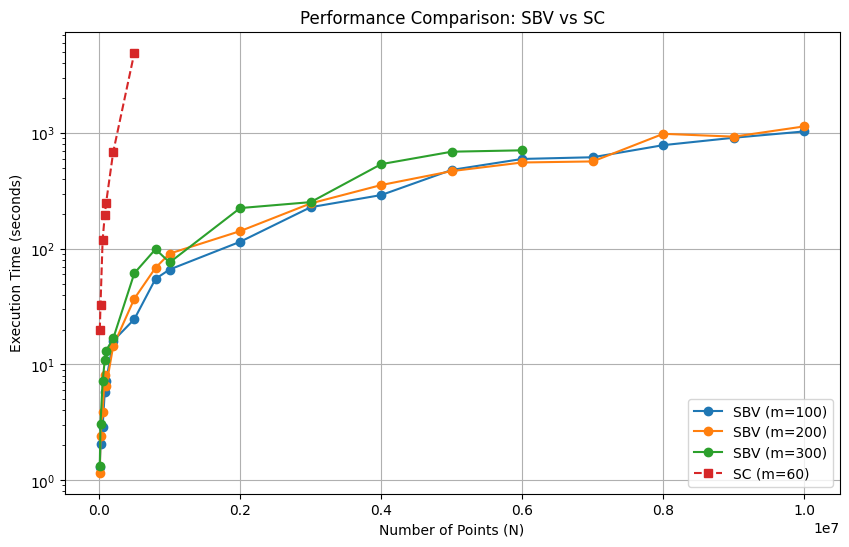

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot SBV lines for different m values
for i, m in enumerate(m_sbv):
    plt.plot(N_bsv[:len(time_sbv[i])], time_sbv[i], 
             label=f'SBV (m={m})', 
             marker='o')

# Plot SC line
plt.plot(N_sc, time_sc, 
         label='SC (m=60)', 
         marker='s', 
         linestyle='--')

plt.xlabel('Number of Points (N)')
plt.ylabel('Execution Time (seconds)')
plt.title('Performance Comparison: SBV vs SC')
plt.grid(True)
plt.legend()
# plt.xscale('log')  # Use log scale for x-axis due to large range
plt.yscale('log')  # Use log scale for y-axis if times vary by orders of magnitude
plt.show()